Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# MODELI PROTOKA SAOBRAĆAJA (1)
## 14.04.2020. 

# Stefan Brankovic

***
<font color='red'>
Preimenovati svesku: File/Rename u __saobracaj1_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 1__: Model sa konstantnom brzinom
Simulirati model protoka saobraćaja sa konstantnom brzinom koji je modelovan parcijalnom diferencijalnom jednačinom:

\begin{equation}
    \frac{\partial\rho(x,t)}{\partial t} + v\frac{\partial\rho(x,t)}{\partial x} = 0
\end{equation}

a) Formirati Python skriptu koja primenom metode konačnih razlika rešava gornju jednačinu za sledeće parametre:
<br>
<ul>
    <li> Brzina automobila $v = 60$ km/h,</li>
    <li> Ukupna dužina posmatranog puta $L = 5$ km,</li>
    <li> Vremenski domen za rešavanje $T = 180$ sekundi,</li>
    <li> Koraci diskretizacije: $\Delta x = 50$ m, $\Delta t = 0.1$ s.</li>
</ul>
Za rešavanje jednačine potrebno je poznavanje početnog uslova:

<ul>
    <li>$\rho(x,0) = 200$ $\text{km}^{-1}$ za $x \leq 0$,</li>
    <li>$\rho(x,0) = 0$ $\text{km}^{-1}$ za $x > 0$,</li>
</ul>

koji može imati smisao semafora koji u trenutku $t = 0$ na poziciji $x = 0$ uključuje zeleno svetlo.

Dodatno potrebno je i poznavanje graničnog uslova $\rho(0,t) = 200$ $\text{km}^{-1}$ za $t > 0$. 

Prikazati 3D grafik i konturni grafik funkcije $\rho(x,t)$. Šta je posledica konstatne brzine vozila?

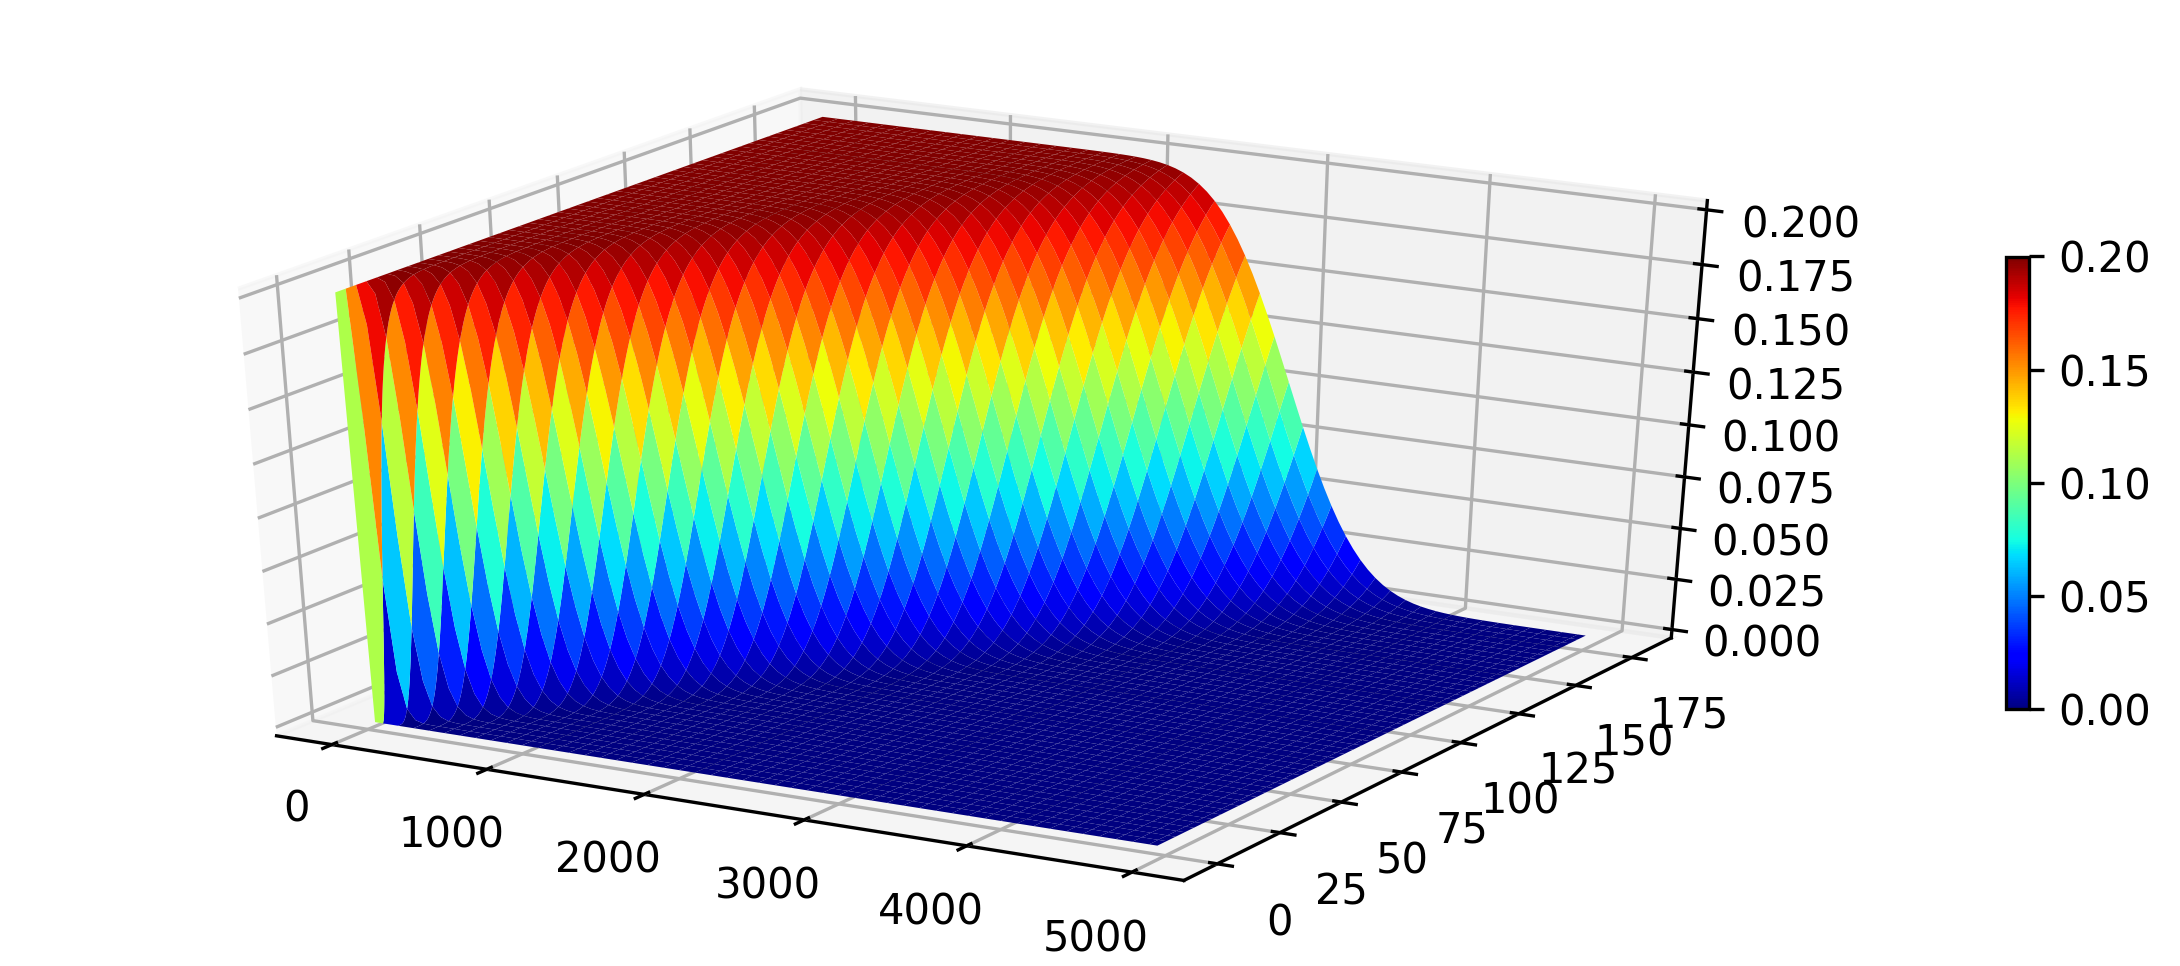

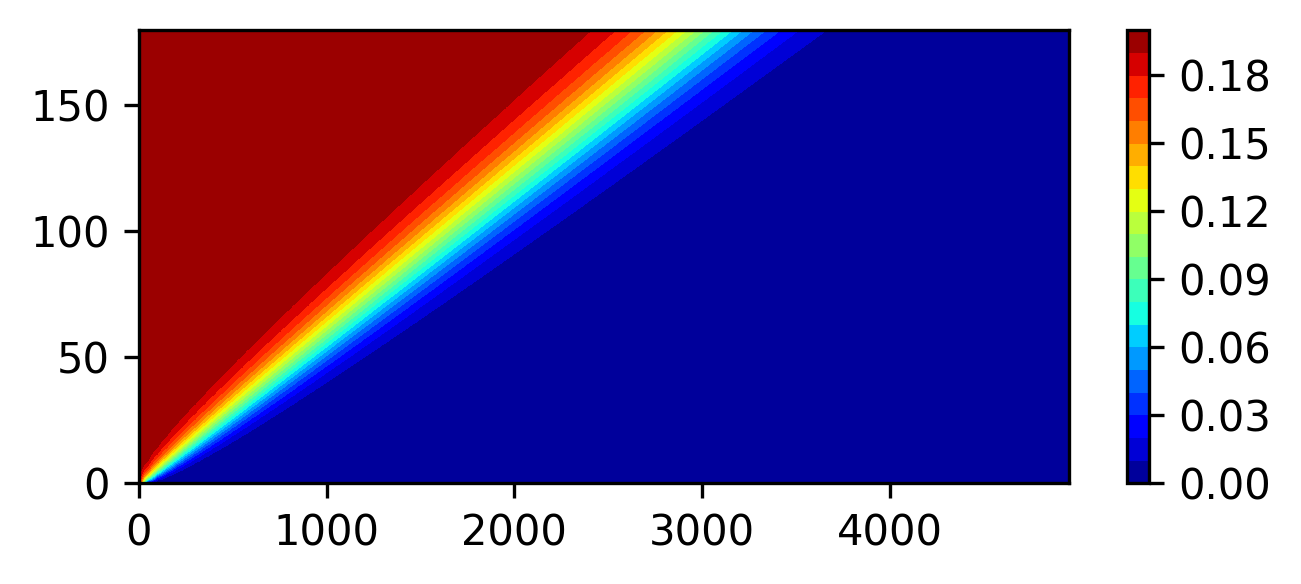

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

v = 60 * 1000 / 3600  # u metrima
L = 5000  # u metrima
T = 180  # u sekundama
deltax = 50  # u metrima 
deltat = 0.1  # u sekundama
r0 = 0.2  # u m^-1

nizx = np.arange(0, L, deltax)
nizt = np.arange(0, T, deltat)

dimx = np.size(nizx)
dimt = np.size(nizt)

r = np.zeros((dimt, dimx))
r[:, 0] = r0


for kt in range(0, dimt - 1, 1):
    for kx in range(1, dimx, 1):
        r[kt + 1, kx] = r[kt, kx] - (deltat / deltax) * v * (r[kt, kx] - r[kt, kx - 1])

xosa, tosa = np.meshgrid(nizx, nizt)
fig = plt.figure(figsize=(10, 4), dpi=300)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xosa, tosa, r, cmap=cm.jet)
fig.colorbar(surf, shrink=0.5)
plt.show()

fig = plt.figure(figsize=(5, 2), dpi=300)
kontura = plt.contourf(nizx, nizt, r, 20, cmap=cm.jet)
fig.colorbar(kontura)
plt.show()

Posledica konstantne brzine je to da za grafik promen gustine dobijamo pravu liniju. 

b) Modelovati isti problem kao iz tačke a) kod koga je promenjen granični uslov, odnosno pretpostavljeno je da postoji semafor koji u trenutku $t = 60$ s uključuje crveno svetlo, a onda u trenutku $t = 120$ s, uključuje zeleno svetlo:
<ul>
    <li> $\rho(0,t) = 200$ $\text{km}^{-1}$ za $0 \leq t < 60$ i $t \geq 120$,</li>
    <li> $\rho(0,t) = 0$ $\text{km}^{-1}$ za $60 \leq t < 120$.</li>
</ul>

Prikazati 3D grafik i konturni grafik funkcije $\rho(x,t)$. Kako je promenjeni granični uslov uticao na rešenje?

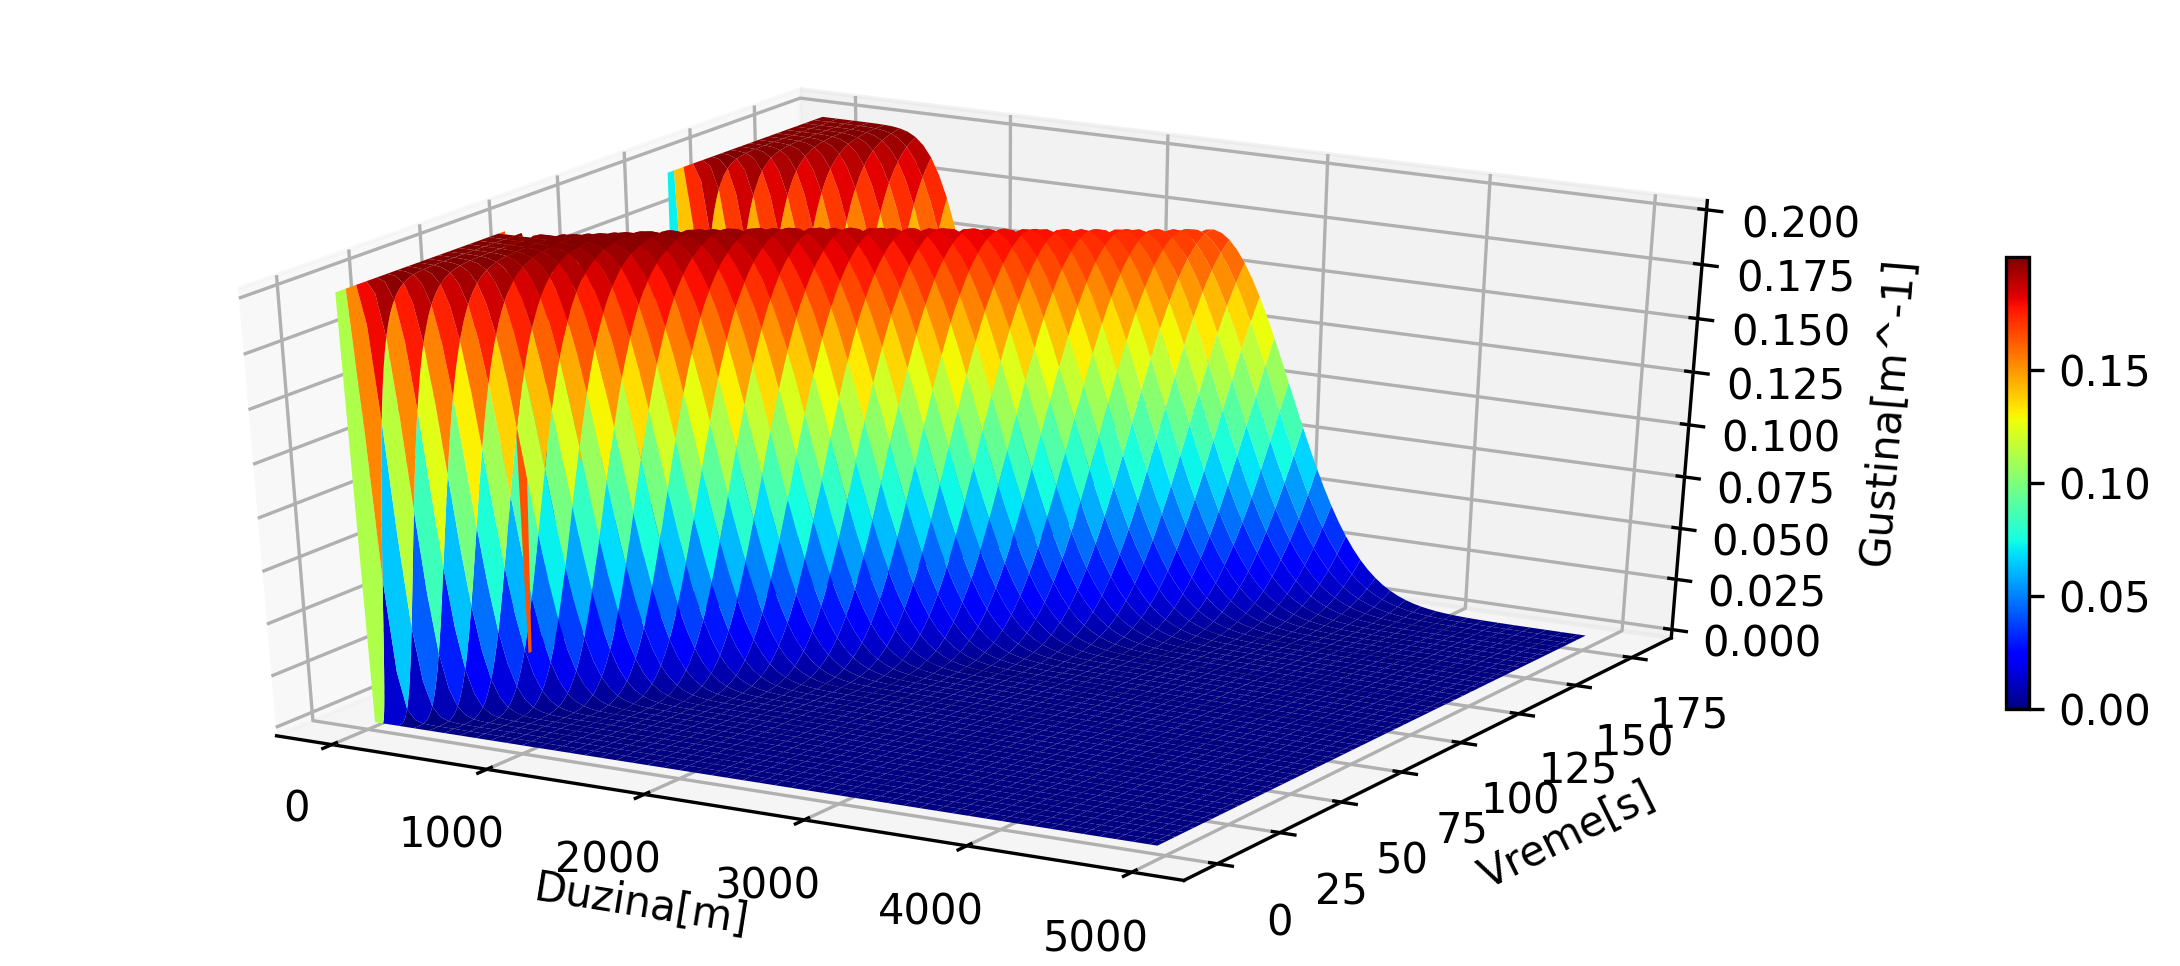

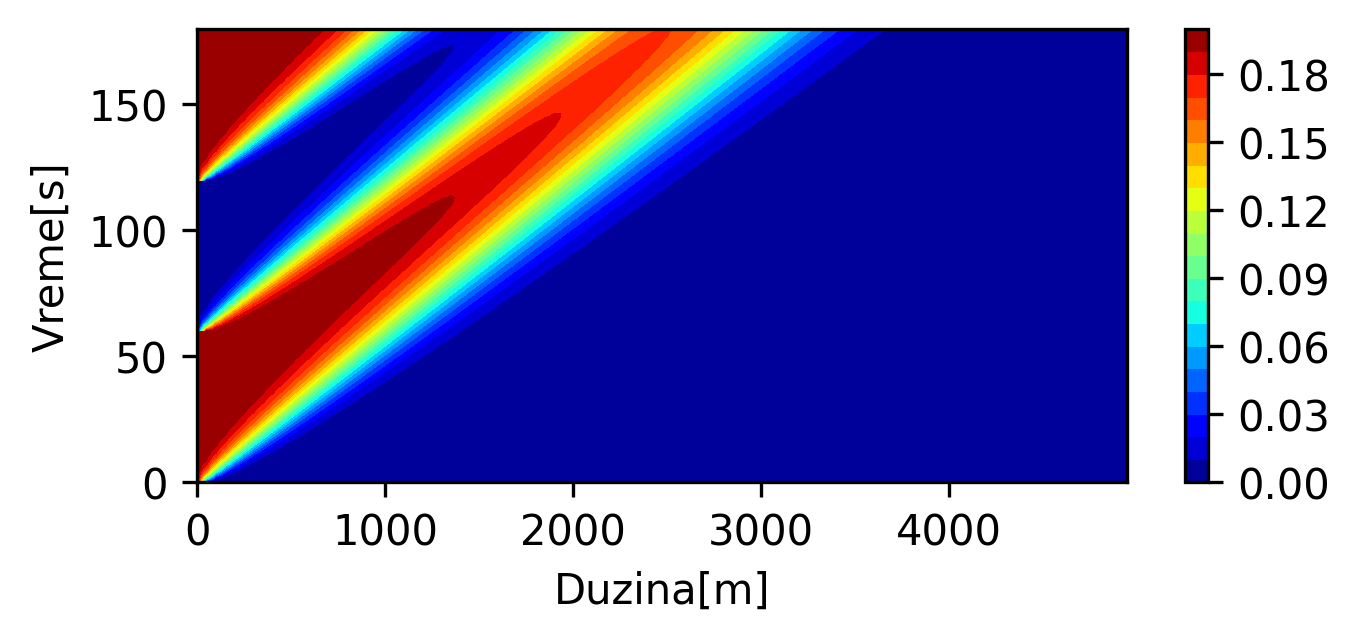

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

v = 60 * 1000 / 3600
L = 5000
T = 180
dx = 50
dt = 0.1
r0 = 0.2

nizx = np.arange(0, L, dx)
nizt = np.arange(0, T, dt)

dimx = np.size(nizx)
dimt = np.size(nizt)

r = np.zeros((dimt, dimx))
r[:, 0] = r0
for kt in range(600, 1200, 1):
    r[kt, 0] = 0

for kt in range(0, dimt - 1, 1):
    for kx in range(1, dimx, 1):
        r[kt + 1, kx] = r[kt, kx] - (dt / dx) * v * (r[kt, kx] - r[kt, kx - 1])

xosa, tosa = np.meshgrid(nizx, nizt)
fig = plt.figure(figsize=(10, 4), dpi=300)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xosa, tosa, r, cmap=cm.jet)
fig.colorbar(surf, shrink=0.5)
ax.set_xlabel("Duzina[m]")
ax.set_ylabel("Vreme[s]")
ax.set_zlabel("Gustina[m^-1]")
plt.show()

fig = plt.figure(figsize=(5, 2), dpi=300)
kontura = plt.contourf(nizx, nizt, r, 20, cmap=cm.jet)
fig.colorbar(kontura)
plt.xlabel("Duzina[m]")
plt.ylabel("Vreme[s]")
plt.show()

Ukljucivanjem semafora u intervalu izmedju 60 i 120 sekundi dobijamo da je brzina v = 0, zbog cega dolazi do potpunog smanjenja gustine, sto se na grafiku odrazava plavom bojom u tom periodu. Prvih 60s se gustina linearno povecava, onda u trenutku t = 60s usled paljenja crvenog svetla semafora linearno smanjuje, sve do trenutka t = 120s kad se na semaforu upali zeleno i gustina opet pocne linearno da raste. 